In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

# 問
調和振動子の初期値問題
$$ \frac{d}{dt} \begin{pmatrix}p \\q\end{pmatrix}
=
J\begin{pmatrix}p \\q\end{pmatrix},\quad J=\begin{pmatrix}0&-1 \\1&0\end{pmatrix}
$$
$$
p\left( 0\right) =1,\ q\left( 0\right) =0
$$

## (1)
初期値 $initial\:value=\begin{pmatrix}p\left( 0\right) \\q\left( 0\right)\end{pmatrix}=\begin{pmatrix}1 \\0\end{pmatrix}$  
時間刻み幅　$h=0.1$  
反復回数 $steps = 1000$

In [2]:
initial_value = np.array([[1],[0]])
h = 0.1
steps=1000

微分方程式をode関数として定義

In [3]:
def ode(x):
    j = np.array([[0,-1],[1,0]])
    dxdt = np.dot(j,x)
    
    return dxdt

陽的Euler法・陰的Euler法・台形則・4次Runge-Kutta法で実装。  
陰的Euler法において、
$$\begin{eqnarray}
\frac{z_{n+1}-z_{n}}{h} &=& \begin{pmatrix}0&-1 \\1&0\end{pmatrix} z_{n+1} \\
z_{n+1} &=& \begin{pmatrix}1&h \\-h&1\end{pmatrix} ^{-1} z_{n} \\
&=& \frac{1}{1+h^2} \begin{pmatrix}1&-h \\h&1\end{pmatrix} z_{n}
\end{eqnarray}$$
を用いる。

In [4]:
def explicit_euler_method(temp, h):
    temp = temp + h*ode(temp)
    
    return temp

In [5]:
def implicit_euler_method(temp, h):
    a = np.array([[1,-h],[h,1]])
    temp = np.dot(a, temp)/(1+h**2)
    
    return temp

In [6]:
def trapezoidal_method(temp, h):
    temp = (explicit_euler_method(temp, h)+implicit_euler_method(temp, h))*0.5
    
    return temp

In [7]:
def runge_kutta_4d(temp, h):
    k1=ode(temp)
    k2=ode(temp + k1*(h*0.5))
    k3=ode(temp + k2*(h*0.5))
    k4=ode(temp + k3*h)
    
    temp = temp + h*(k1/6 + k2/3 + k3/3 + k4/6)
    
    return temp

以下、可視化の関数を定義  
横軸：時間、縦軸：関数値  
横軸：p、縦軸：q  
X軸：p、Y軸：q、Z軸：時間  
の3種類の可視化をおこなう

In [8]:
def explicit_euler_method_plot(temp, h, steps):
    time = np.arange(steps+1)
    result=[]
    result.append(temp)
    for i in range(steps):
        temp = explicit_euler_method(temp, h)
        result.append(temp)

    result = np.array(result)
    
    p = result[:,0]
    q = result[:,1]

    fig = plt.figure(figsize=(10,5),dpi=100)
    plt.plot(time, p)
    plt.plot(time, q)
    plt.title("explicit_euler_method")
    plt.xlabel("time")
    plt.ylabel("function")
    plt.show()
    
    fig = plt.figure(figsize=(10,5),dpi=100)
    plt.plot(p, q)
    plt.xlabel("p")
    plt.ylabel("q")
    plt.show()
    
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_xlabel("p")
    ax.set_ylabel("q")
    ax.set_zlabel("time")
    ax.plot3D(p,q,time)
    plt.show()

In [9]:
def implicit_euler_method_plot(temp, h, steps):
    time = np.arange(steps+1)
    result=[]
    result.append(temp)
    for i in range(steps):
        temp = implicit_euler_method(temp, h)
        result.append(temp)

    result = np.array(result)
    
    p = result[:,0]
    q = result[:,1]

    fig = plt.figure(figsize=(10,5),dpi=100)
    plt.plot(time, p)
    plt.plot(time, q)
    plt.title("implicit_euler_method")
    plt.xlabel("time")
    plt.ylabel("function")
    plt.show()
    
    fig = plt.figure(figsize=(10,5),dpi=100)
    plt.plot(p, q)
    plt.xlabel("p")
    plt.ylabel("q")
    plt.show()
    
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_xlabel("p")
    ax.set_ylabel("q")
    ax.set_zlabel("time")
    ax.plot3D(p,q,time)
    plt.show()

In [10]:
def trapezoidal_method_plot(temp, h, steps):
    time = np.arange(steps+1)
    result=[]
    result.append(temp)
    for i in range(steps):
        temp = trapezoidal_method(temp, h)
        result.append(temp)

    result = np.array(result)
    
    p = result[:,0]
    q = result[:,1]

    fig = plt.figure(figsize=(10,5),dpi=100)
    plt.plot(time, p)
    plt.plot(time, q)
    plt.title("trapezoidal_method")
    plt.xlabel("time")
    plt.ylabel("function")
    plt.show()
    
    fig = plt.figure(figsize=(10,5),dpi=100)
    plt.plot(p, q)
    plt.xlabel("p")
    plt.ylabel("q")
    plt.show()
    
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_xlabel("p")
    ax.set_ylabel("q")
    ax.set_zlabel("time")
    ax.plot3D(p,q,time)
    plt.show()

In [11]:
def runge_kutta_4d_plot(temp, h, steps):
    time = np.arange(steps+1)
    result=[]
    result.append(temp)
    for i in range(steps):
        temp = runge_kutta_4d(temp, h)
        result.append(temp)

    result = np.array(result)
    
    p = result[:,0]
    q = result[:,1]

    fig = plt.figure(figsize=(10,5),dpi=100)
    plt.plot(time, p)
    plt.plot(time, q)
    plt.title("Runge-Kutta-4d")
    plt.xlabel("time")
    plt.ylabel("function")
    plt.show()
    
    fig = plt.figure(figsize=(10,5),dpi=100)
    plt.plot(p, q)
    plt.xlabel("p")
    plt.ylabel("q")
    plt.show()
    
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_xlabel("p")
    ax.set_ylabel("q")
    ax.set_zlabel("time")
    ax.plot3D(p,q,time)
    plt.show()

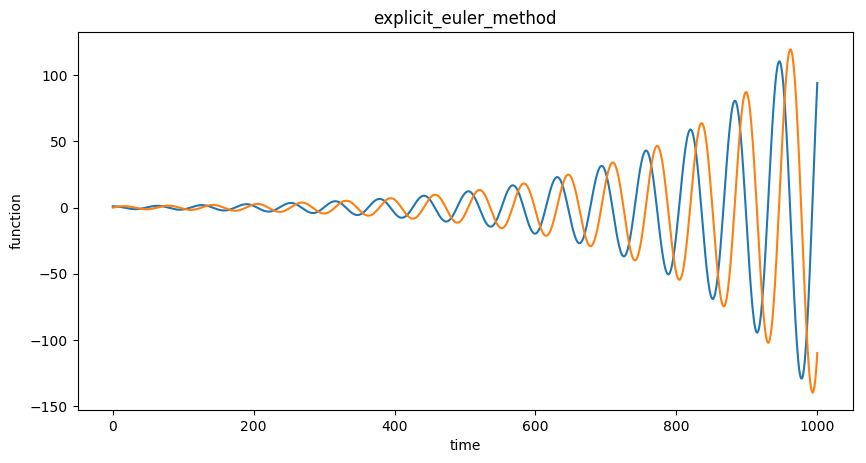

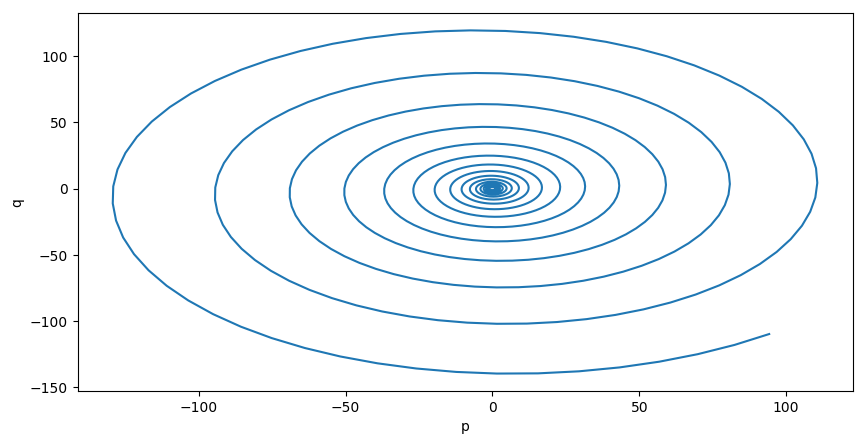

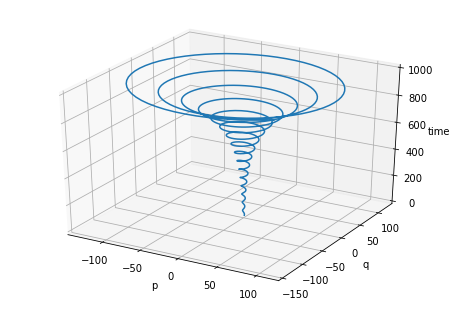

In [12]:
temp = initial_value
explicit_euler_method_plot(temp, h, steps)

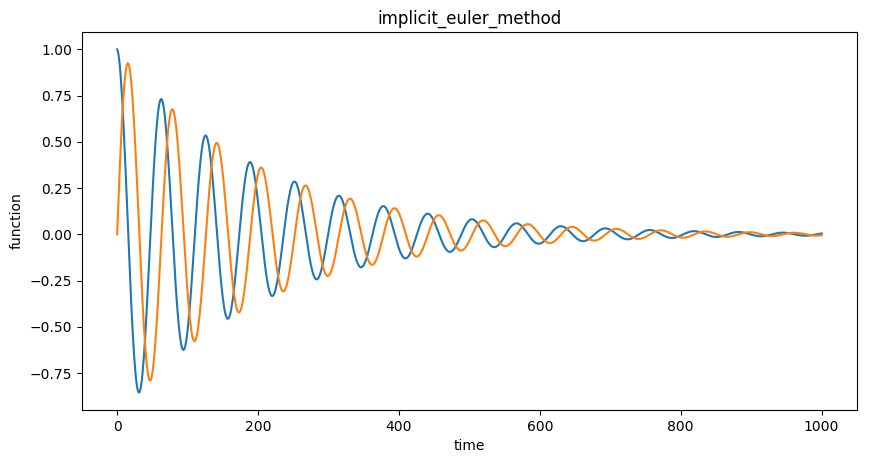

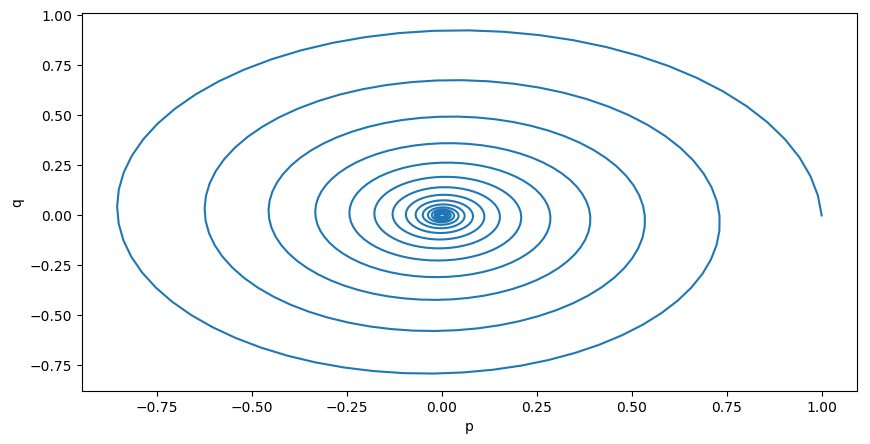

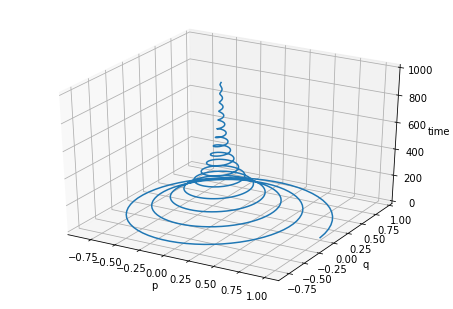

In [13]:
implicit_euler_method_plot(temp, h, steps)

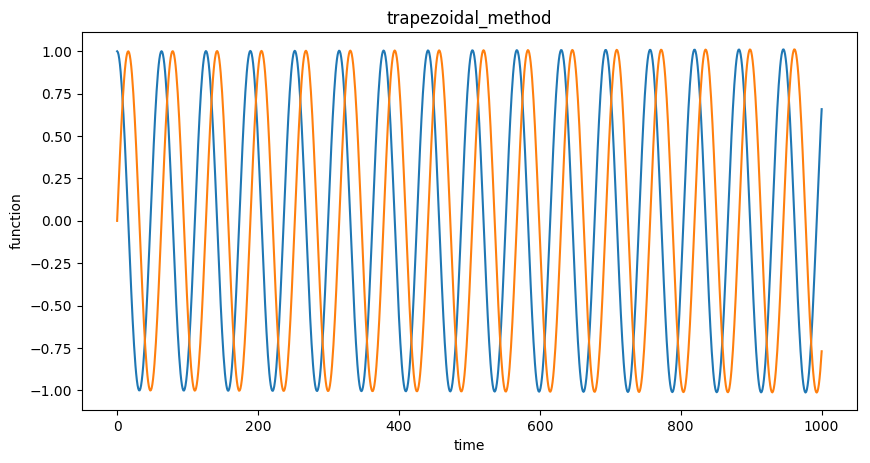

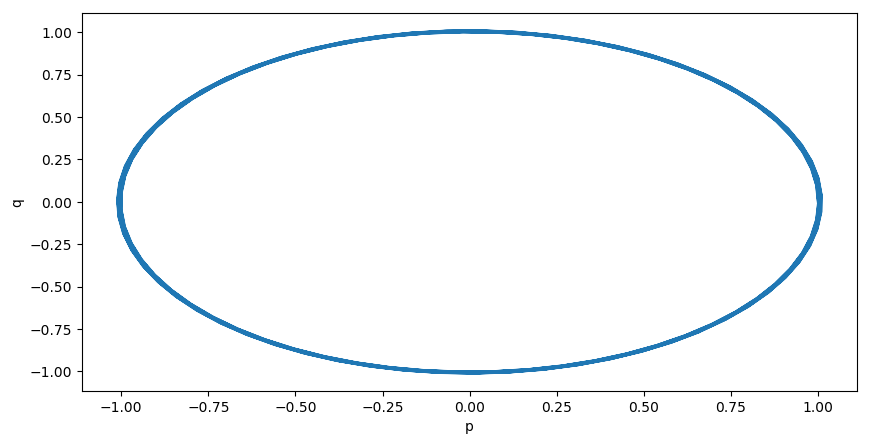

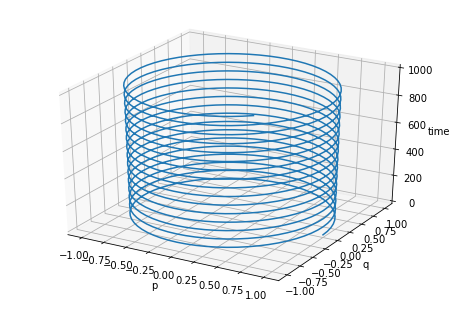

In [14]:
trapezoidal_method_plot(temp, h, steps)

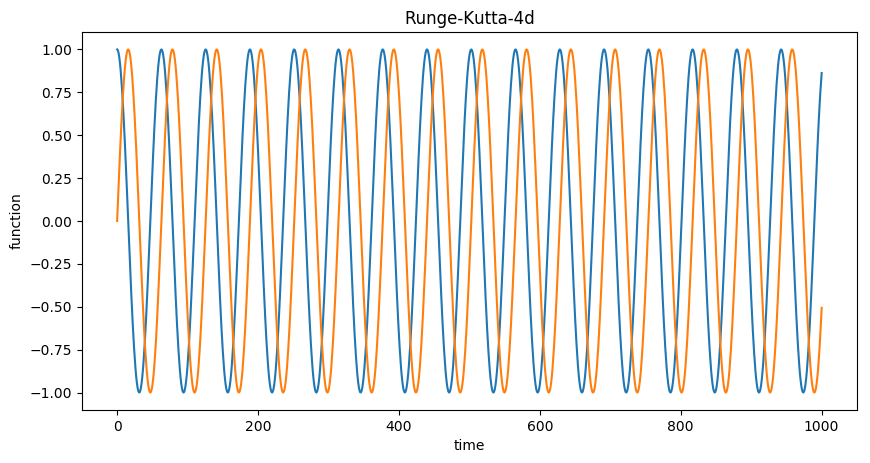

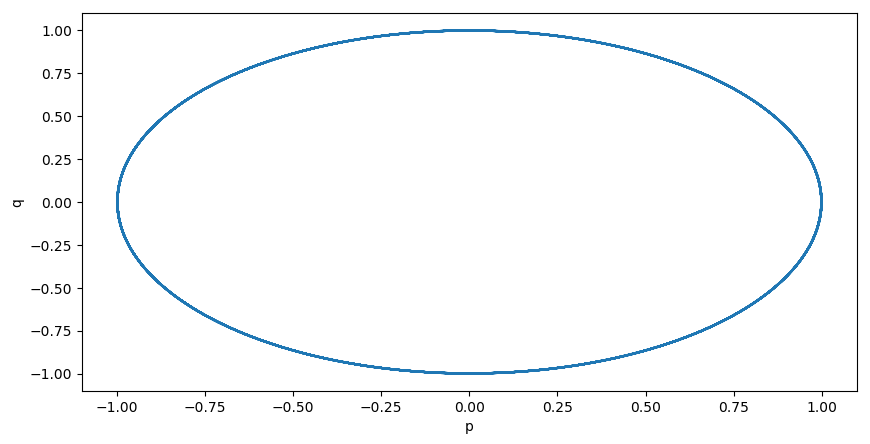

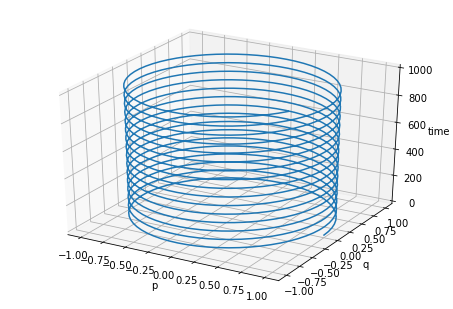

In [15]:
runge_kutta_4d_plot(temp, h, steps)

# (2)

複数の刻み幅、ステップ数で解の軌道を可視化する。

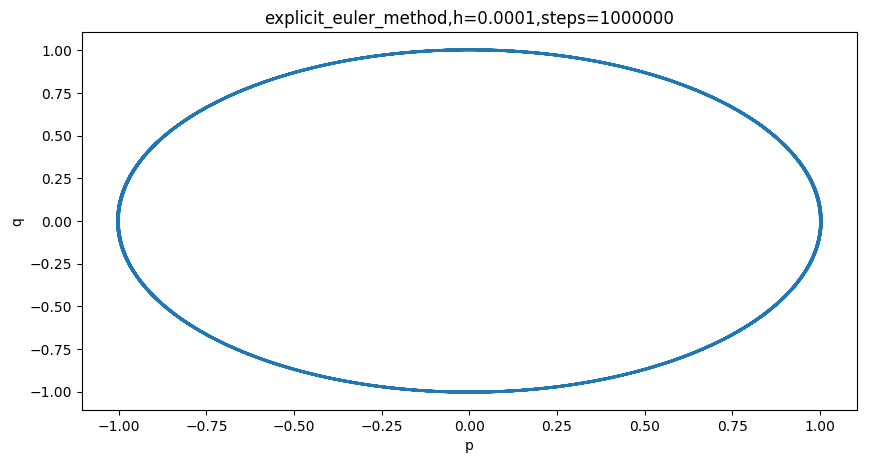

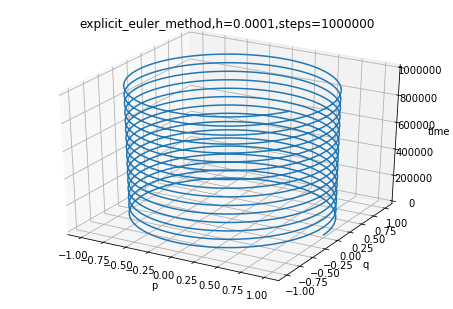

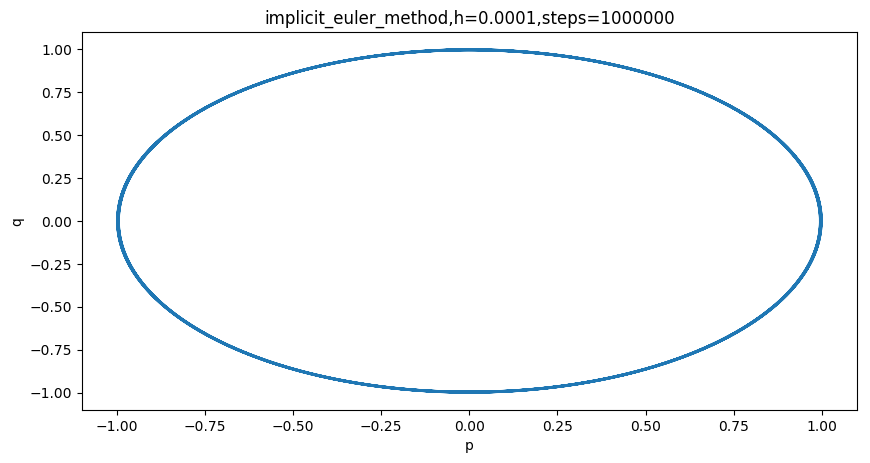

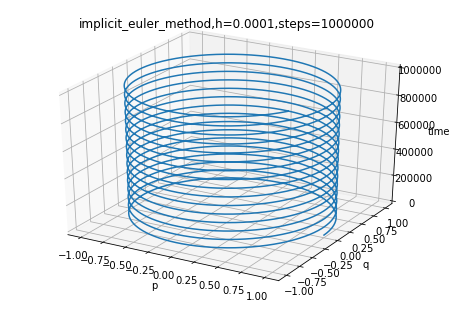

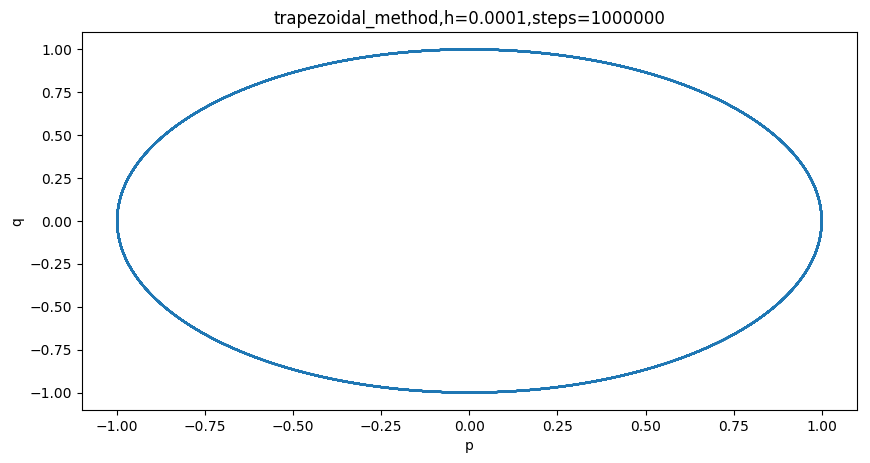

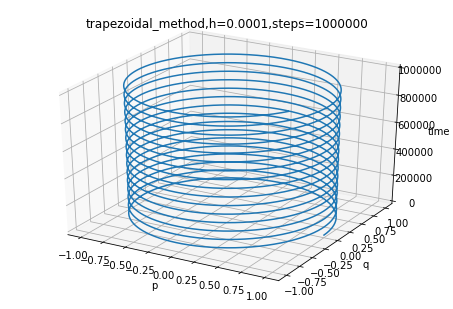

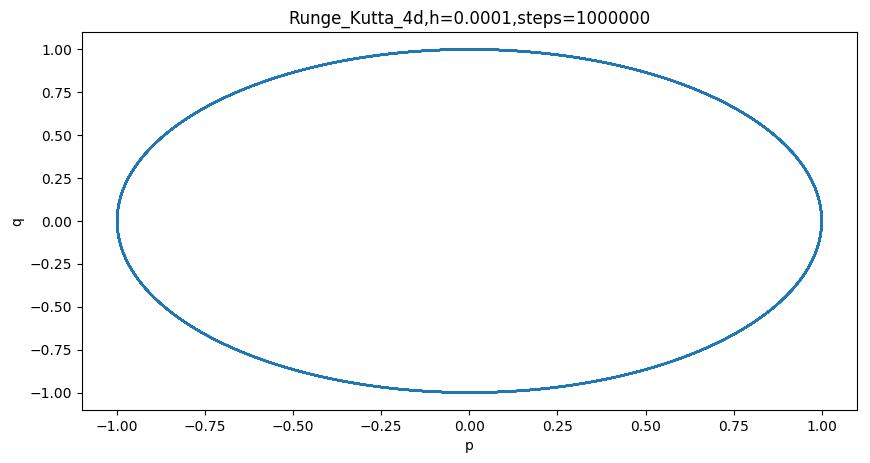

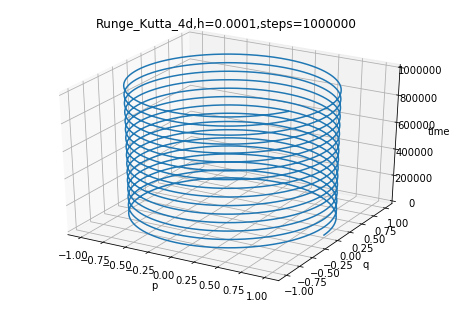

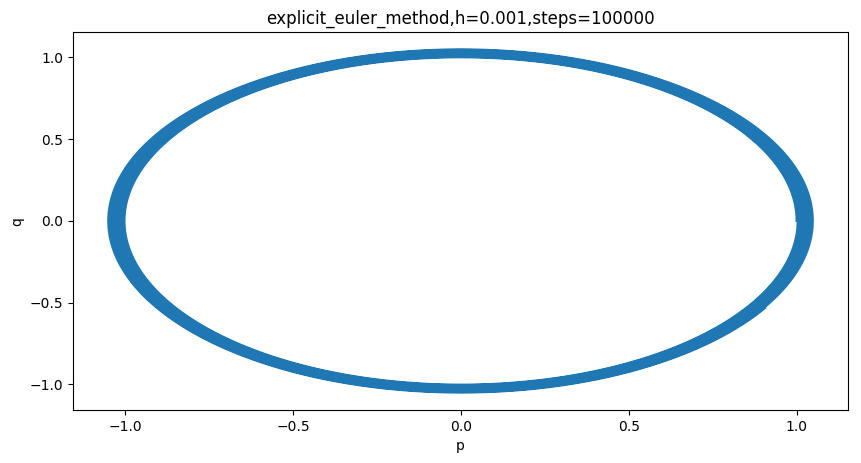

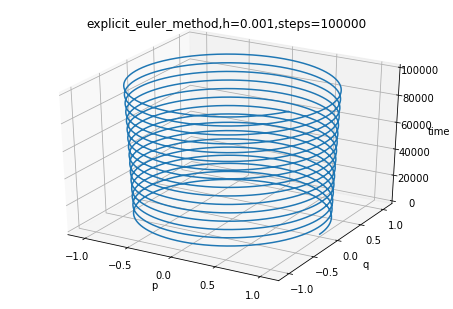

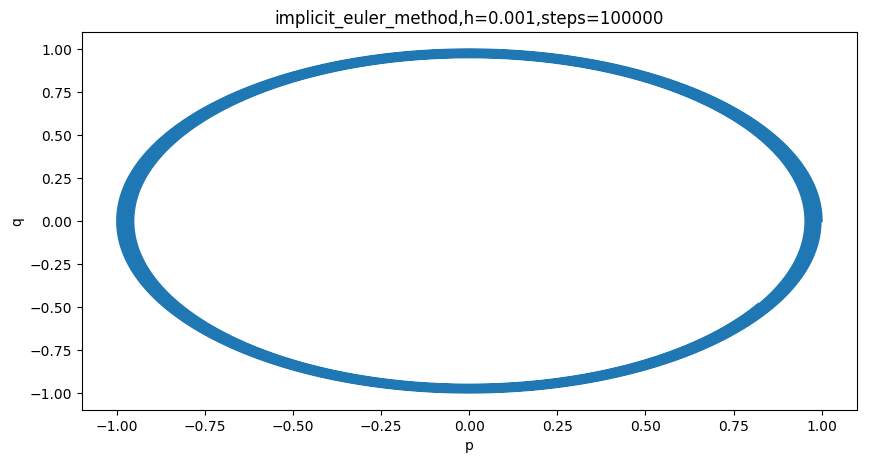

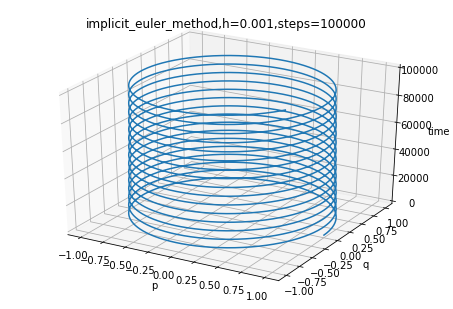

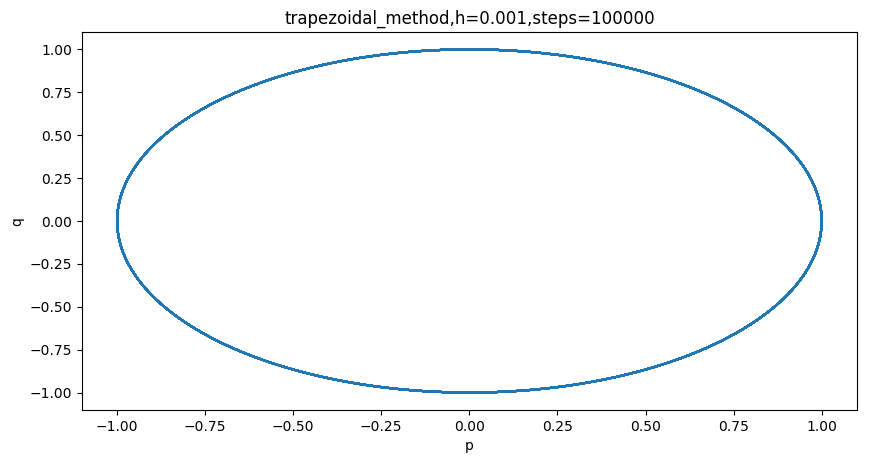

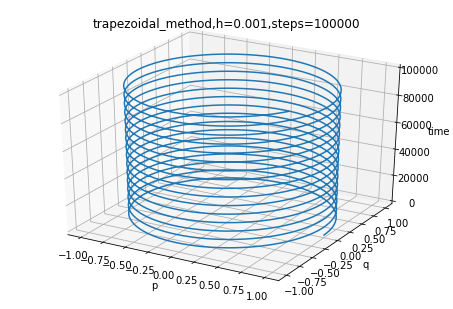

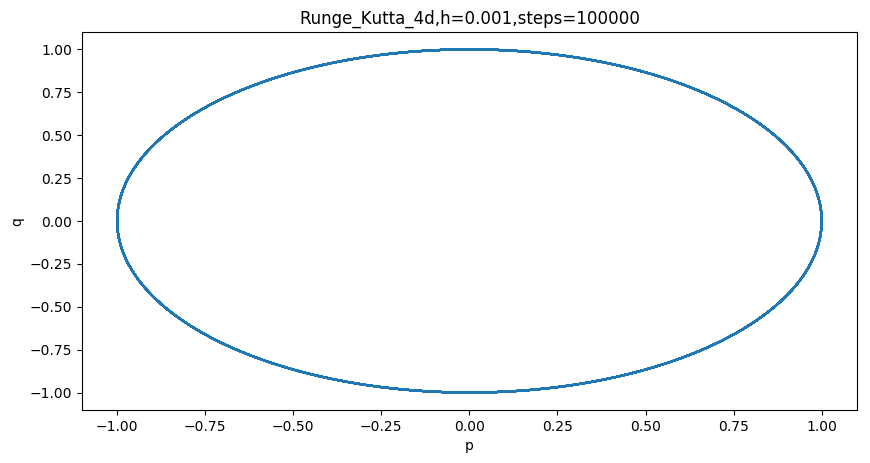

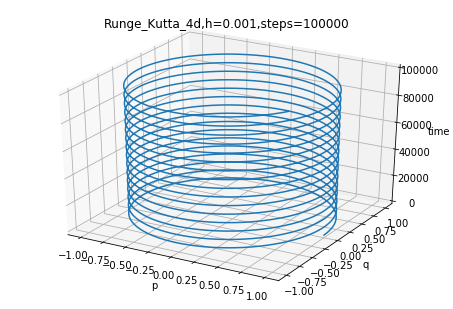

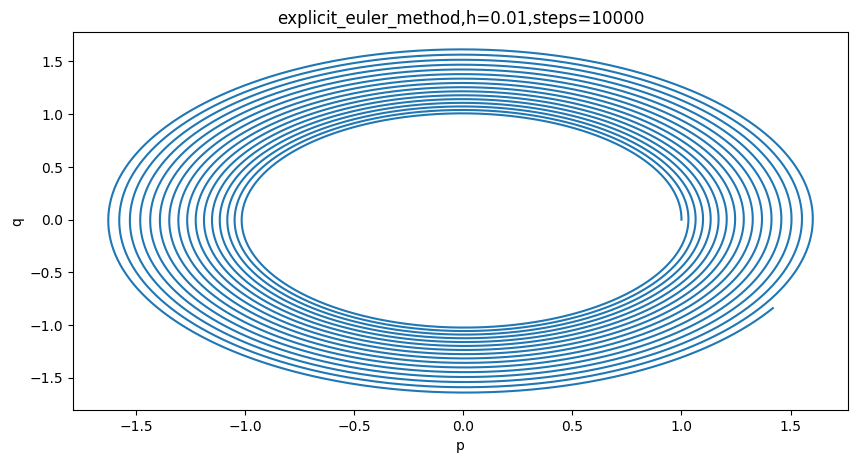

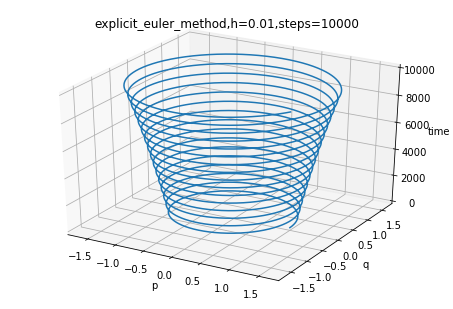

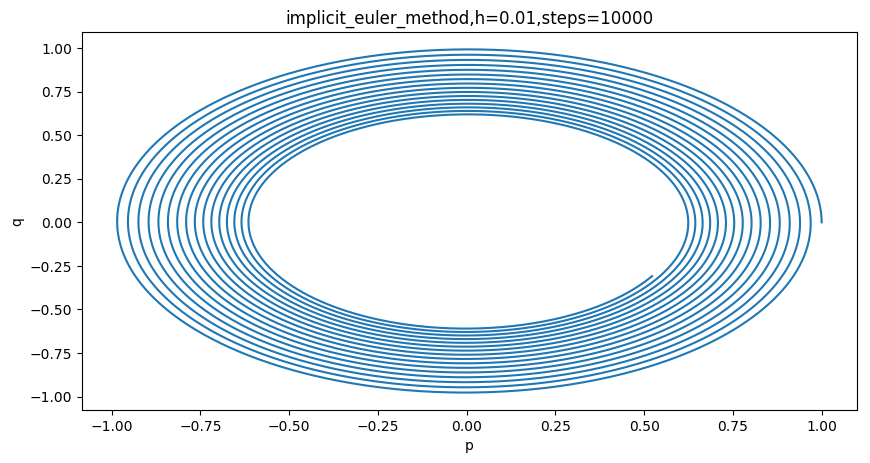

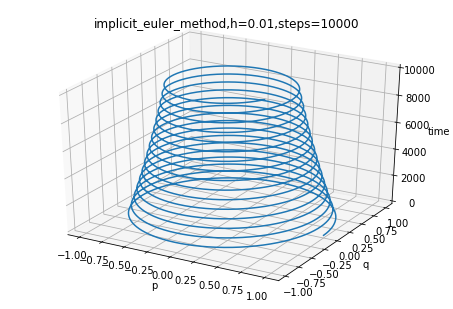

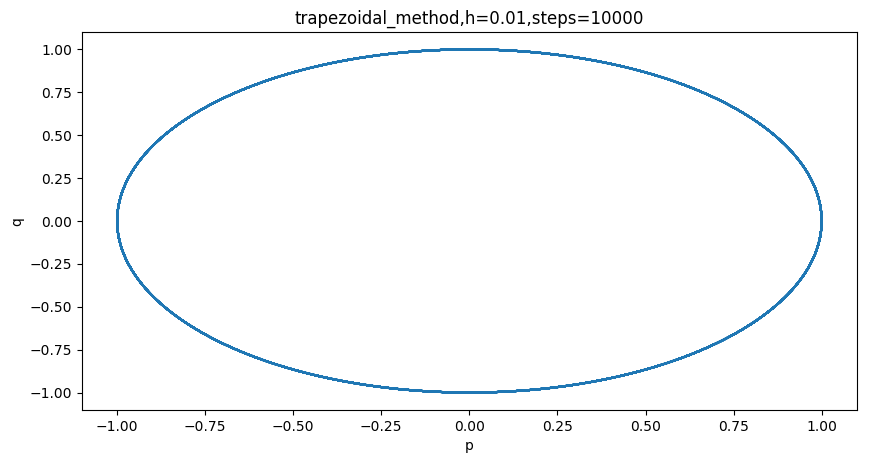

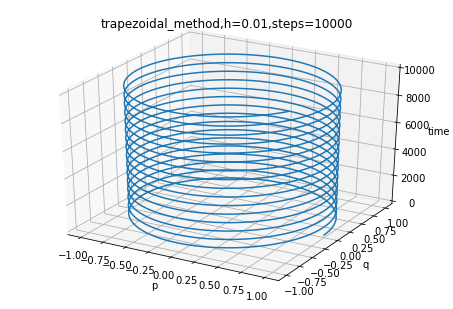

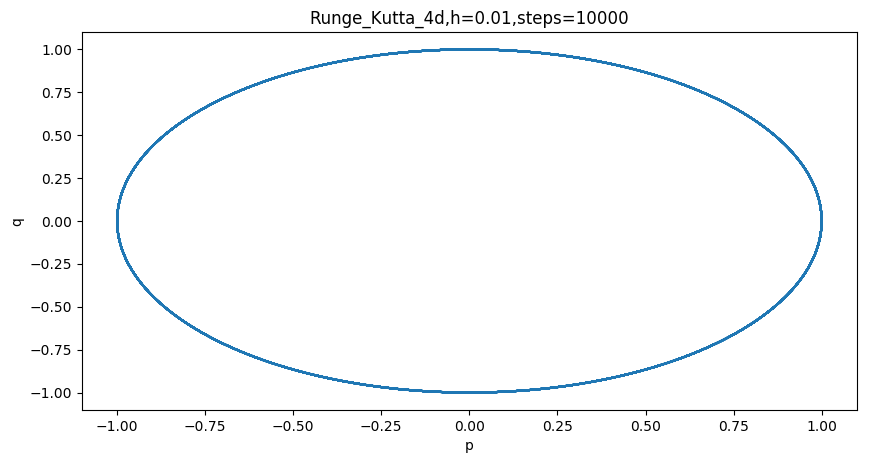

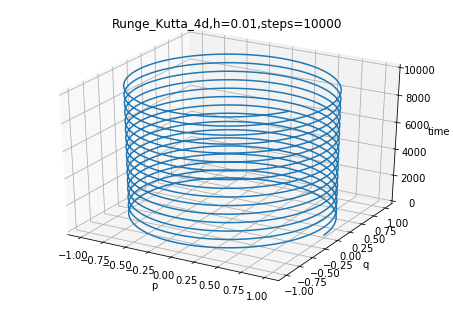

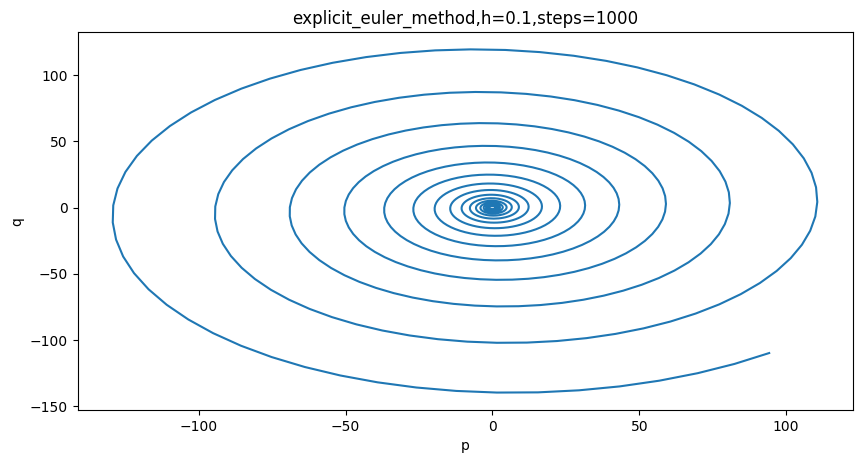

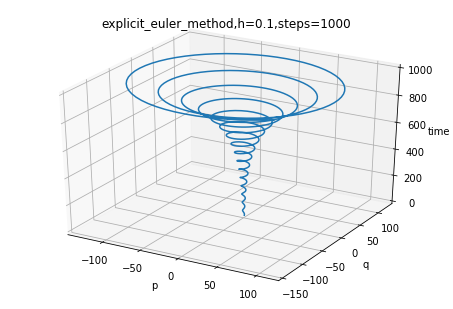

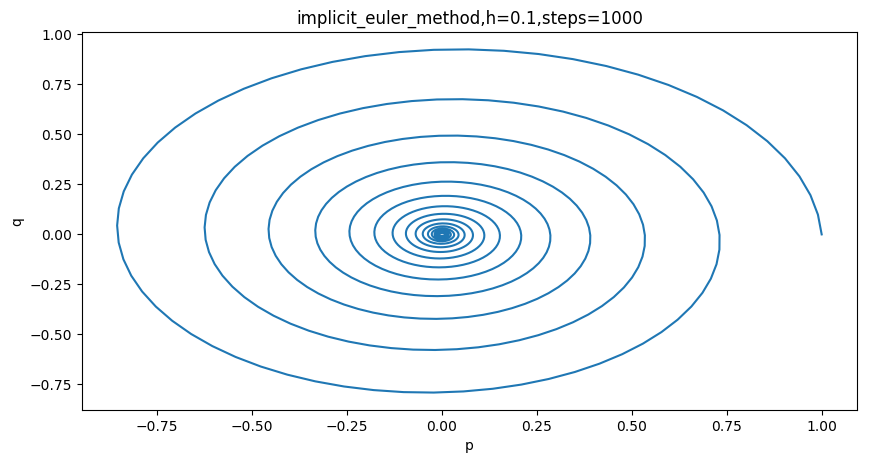

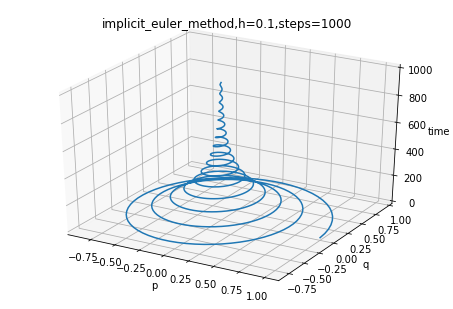

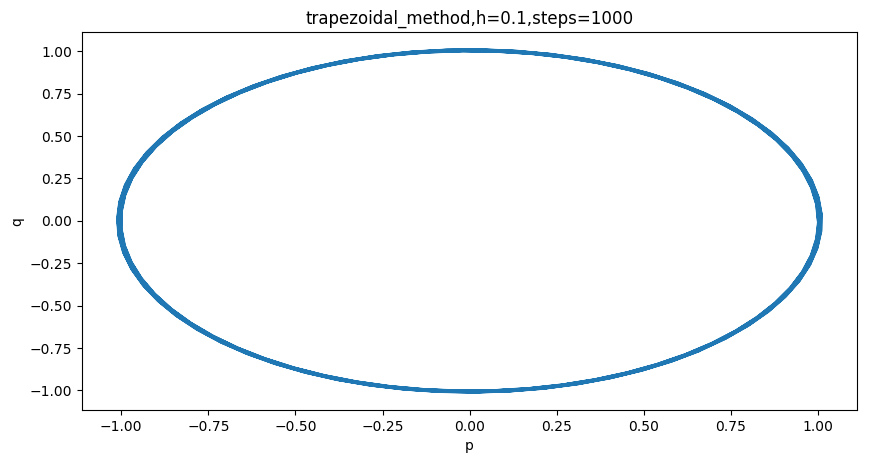

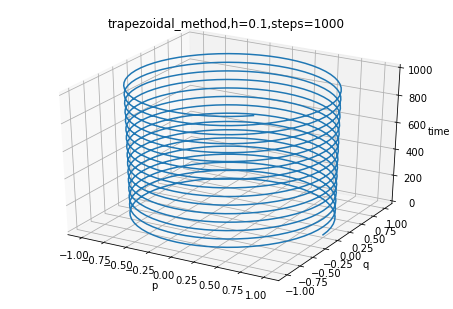

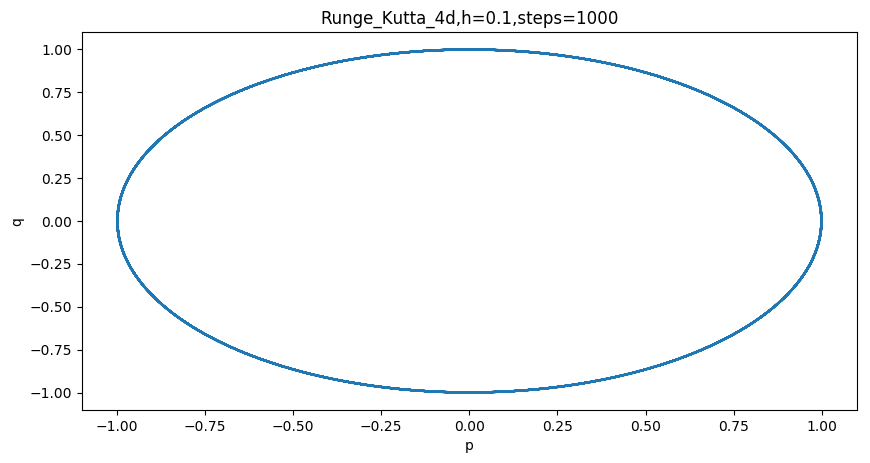

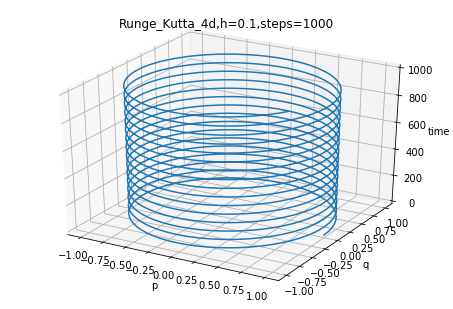

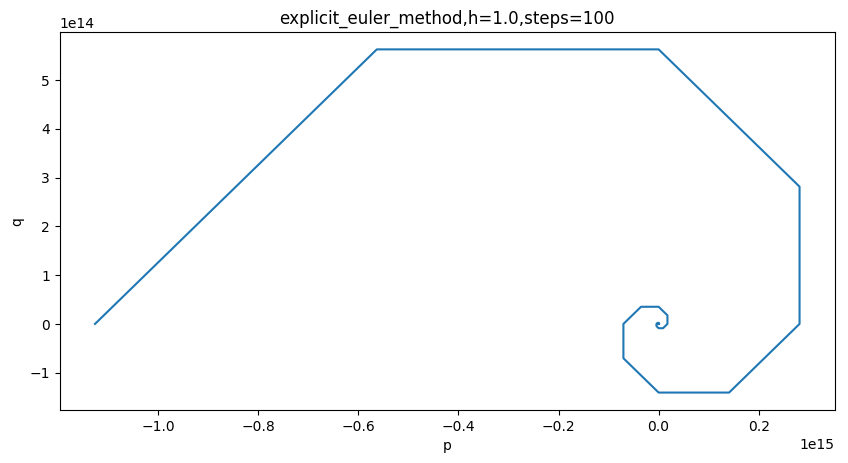

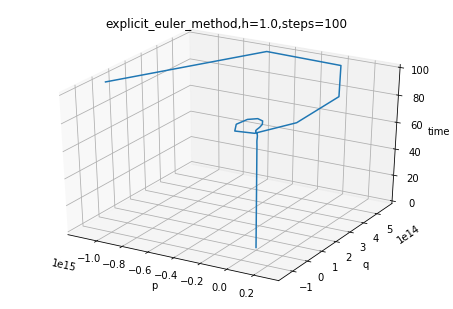

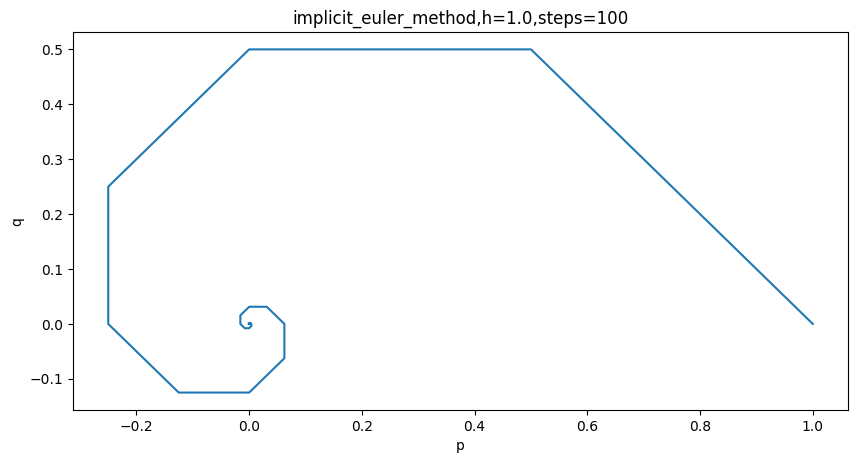

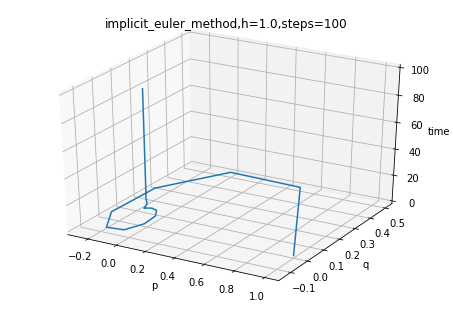

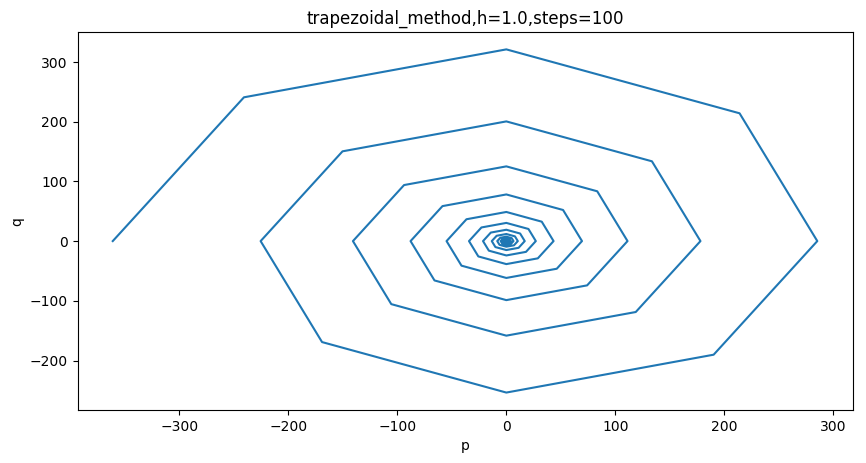

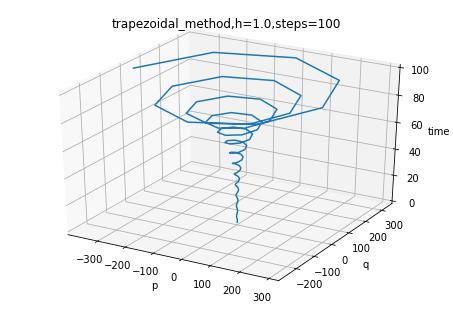

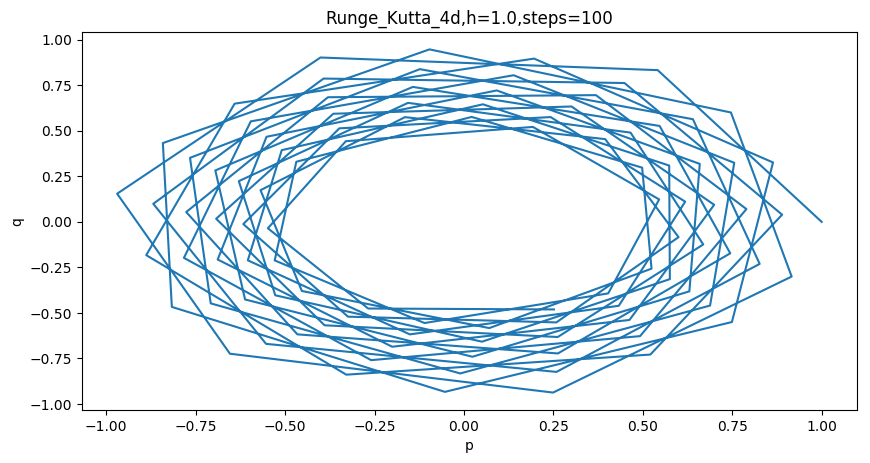

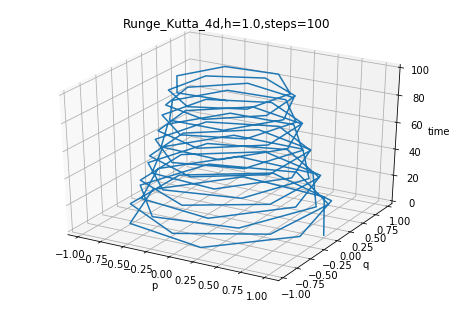

In [16]:
title = ["explicit_euler_method", "implicit_euler_method", "trapezoidal_method", "Runge_Kutta_4d"]
h=0.0001
for i in range(5):
    steps = 10**(6-i)
    result=[]
    temp=initial_value
    temp1=temp
    temp2=temp
    temp3=temp
    temp4=temp
    result.append([temp1, temp2, temp3, temp4])
    for j in range(steps):
        temp1 = explicit_euler_method(temp1, h)
        temp2 = implicit_euler_method(temp2, h)
        temp3 = trapezoidal_method(temp3, h)
        temp4 = runge_kutta_4d(temp4, h)
        temp5 = [temp1, temp2, temp3, temp4]

        result.append(temp5)

    result = np.array(result)
    time = np.arange(len(result))
    
    for k in range(4):
        p = result[:,k,0]
        q = result[:,k,1]
        
        fig = plt.figure(figsize=(10,5),dpi=100)
        plt.plot(p, q)
        plt.title(f"{title[k]},h={0.0001*10**(i)},steps={steps}")
        plt.xlabel("p")
        plt.ylabel("q")
        plt.show()
        
        fig = plt.figure()
        ax = Axes3D(fig)
        ax.set_title(f"{title[k]},h={0.0001*10**(i)},steps={steps}")
        ax.set_xlabel("p")
        ax.set_ylabel("q")
        ax.set_zlabel("time")
        ax.plot3D(p,q,time)
        plt.show()
    
    h = h*10

微分方程式は、
$$\begin{eqnarray}
\frac{d^2}{dt^2} x = -x \\
\left( x=p, q\right)
\end{eqnarray}$$
であり、$x=e^{\lambda t}$を代入すると、
$$\begin{eqnarray}
\lambda ^2 e^{\lambda t} &=& -e^{\lambda t}\\
\lambda &=& \pm i
\end{eqnarray}$$
すなわち、一般解とその1階微分は、
$$\begin{eqnarray}
x &=& C_{1}e^{i t}+C_{2}e^{-i t} \\
&=& \left( C_{1}+C_{2} \right) \cos t + \left( C_{1}-C_{2} \right) \sin t
\end{eqnarray}$$
$p(0)=1$、$q(0)=0$より、
$$\begin{eqnarray}
p &=& \frac{1}{2} \left( e^{i t}+e^{-i t} \right) = \cos t \\
q &=& \frac{1}{2} \left( e^{i t}-e^{-i t} \right) = \sin t
\end{eqnarray}$$
である。すなわち、$p$、$q$は、$e^{it}$と$e^{it}$の線形結合である。よって、
$$ x =   \left\{
    \begin{array}{l}
      e^{it} \\
      e ^{-it}
    \end{array}
  \right.
$$
として、それぞれの安定性を議論する。

### ①
陽的Euler法、
$$\begin{eqnarray}
\frac{x_{n+1}-x_{n}}{h} &=& \frac{d}{dt}x_{n} = \pm i x_{n} \\
x_{n+1} &=& \left( 1\pm ih \right) x_{n}
\end{eqnarray}$$
の安定条件は、
$$ \left| 1\pm ih \right| \leq 1$$
であり、刻み幅$h$をどれだけ小さくしても不安定である。事実、$h=10
^{-2}$より大きい場合、可視化して明らかに発散していることが分かる。だが、$h=10^{-4}$程度まで小さくすると、$100$万ステップでも比較的安定している。

### ②
陰的Euler法、
$$\begin{eqnarray}
\frac{x_{n+1}-x_{n}}{h} &=& \frac{d}{dt}x_{n+1} = \pm i x_{n+1} \\
x_{n+1} &=& \left( \frac{1}{1\mp ih} \right) x_{n}
\end{eqnarray}$$
の安定条件は、
$$ \left| 1\mp ih \right| \geq 1$$
であり、いかなる刻み幅$h$を取っても安定である。しかしながら、$h$が大きくなればなるほど、分母の絶対値が大きくなり、$0$に収束してしまう。事実、$h=10^{-2}$より大きい場合、可視化して明らかに発散していることが分かる。だが、$h=10^{-4}$程度まで小さくすると、$100$万ステップでも比較的安定している。

### ③
台形則、
$$\begin{eqnarray}
\frac{x_{n+1}-x_{n}}{h} &=& \frac{1}{2} \left( \frac{d}{dt}x_{n+1} + \frac{d}{dt}x_{n} \right) = \pm \frac{i}{2} \left( x_{n+1}+x_{n} \right)\\
x_{n+1} &=& \left( \frac{2\pm ih}{2\mp ih} \right) x_{n} = \left( \frac{2-h^2}{4+h^2} \pm i \frac{4h}{4+h^2} \right) x_{n}
\end{eqnarray}$$
の安定条件は、
$$ \left| \frac{2-h^2}{4+h^2} \pm i \frac{4h}{4+h^2} \right| \geq 1$$
であり、左辺は、
$$ \left| \frac{2-h^2}{4+h^2} \pm i \frac{4h}{4+h^2} \right| ^2 = \frac{\left( 4-h^2\right) ^2 + 16h^2}{\left( 4+h\right) ^2} = 1$$
であるから、いかなる刻み幅$h$を取っても安定である。しかしながら、$h$が大きくなればなるほど、計算誤差が生じてしまう。事実、$h=1$の場合、可視化して明らかに発散していることが分かる。だが、$h=10^{-2}$では安定であり、オイラー法より正確である。

### ④
4次Runge-Kutta法では、以下の画像の範囲が安定領域であり、$z = \pm i$は安定である。

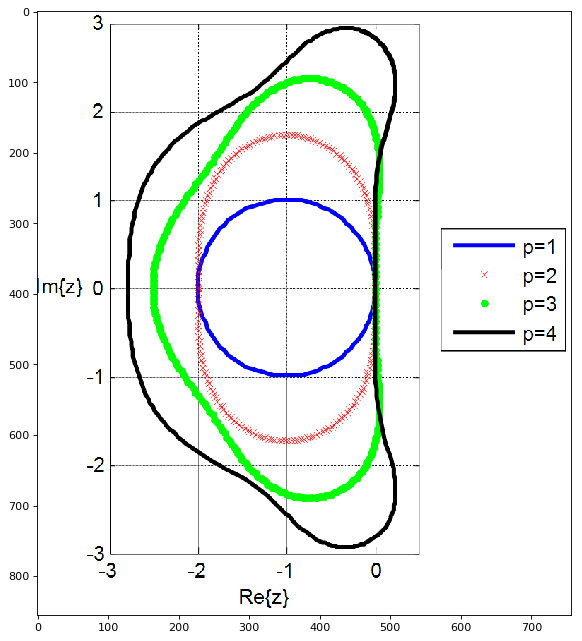

In [17]:
im = Image.open("/Users/takahiro/AnacondaProjects/runge_kutta.png")
im_list = np.asarray(im)
plt.figure(figsize=(10, 10), dpi=80)
plt.imshow(im_list)
plt.show()